## Comparing users inside a group

What we can do is find useful data for each user in a group ie:
* number of times they revised
* total time spent on the platform
* total number of revisions when revising 

Let's start our study on group 1 -- with adaptive feedback and reflective prompts.
Let's import useful data

In [39]:
import import_ipynb
from InsertsDelComparisons import get_data_per_session, data_computation_on_groups, get_time_spent_for_user
import pandas as pd
import seaborn as sns

In [1]:
%store -r INDICES

In [130]:
def data_computation_on_group(group_number):
    #create an array as long as the number of indices in the group
    number_of_times_revised = [0] * len(INDICES[group_number-1])
    time_spent = [0] * len(INDICES[group_number-1])
    total_num_revisions = [0] * len(INDICES[group_number-1])

    for i, user in enumerate(INDICES[group_number-1]):
        time_spent[i] = get_time_spent_for_user(user)
        num_revisions = 0
        times_revised = 0
        try:
            data = get_data_per_session(user)
        except: continue
        for session in data:
            if len(session) > 1:
                with_revision = session[1:]
                times_revised += 1
                with_revision = with_revision.values
                num_revisions += with_revision[0][0] + with_revision[0][1]
               
        total_num_revisions[i] = num_revisions
        number_of_times_revised[i] = times_revised

    result = pd.DataFrame([number_of_times_revised, time_spent, total_num_revisions]).T
    result.reset_index(inplace=True)
    result.columns = ['index','number of times revised', 'time spent', 'total num revisions']

    return result

2022-09-04 14:01:31.746981 2022-09-04 14:48:49.568420


<AxesSubplot:xlabel='index', ylabel='time spent'>

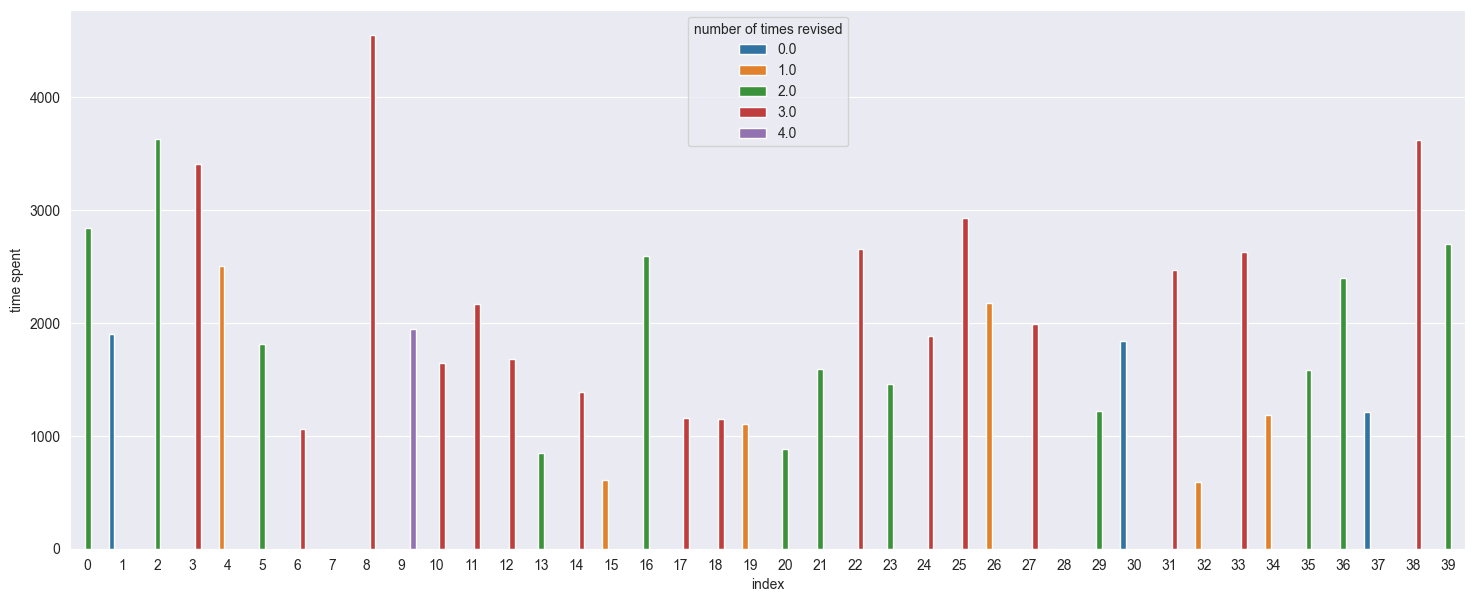

In [131]:
sns.barplot(data=data_computation_on_group(1), x='index', y='time spent', hue='number of times revised')